In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Udemy Files - Deep Learning material/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.shape

(10000, 14)

In [0]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [0]:
k=df.columns

for col in k:
    if df[col].dtype=='object':
        temp=pd.get_dummies(df[col],drop_first=True,prefix=col)
        df=pd.concat([df,temp],1)
        df.drop([col],axis=1,inplace=True)

In [8]:
df.shape

(10000, 12)

In [9]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [0]:
New_order = [0,1,2,3,4,5,6,7,9,10,11,8]
df = df[df.columns[New_order]]

In [11]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Exited
0,619,42,2,0.00,1,1,1,101348.88,0,0,0,1
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0,1
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0


In [0]:
X = df.iloc[:,:11].values
y = df.iloc[:,11].values

In [13]:
X

array([[619.,  42.,   2., ...,   0.,   0.,   0.],
       [608.,  41.,   1., ...,   0.,   1.,   0.],
       [502.,  42.,   8., ...,   0.,   0.,   0.],
       ...,
       [709.,  36.,   7., ...,   0.,   0.,   0.],
       [772.,  42.,   3., ...,   1.,   0.,   1.],
       [792.,  28.,   4., ...,   0.,   0.,   0.]])

In [14]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
X_train.shape , X_test.shape

((8000, 11), (2000, 11))

In [18]:
y_train.shape , y_test.shape

((8000,), (2000,))

In [19]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


In [0]:
model = Sequential()


model.add(Dense(units=11,activation='relu'))

model.add(Dense(units=6,activation='relu'))

model.add(Dense(units=3,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam',metrics = ['accuracy'])

In [21]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=100,batch_size = 10,
          validation_data=(X_test, y_test), verbose=1
          )

Train on 8000 samples, validate on 2000 samples
Epoch 1/100
8000/8000 [==============================] - 3s 400us/step - loss: 0.5367 - accuracy: 0.7476 - val_loss: 0.4245 - val_accuracy: 0.8110
Epoch 2/100
8000/8000 [==============================] - 3s 389us/step - loss: 0.3987 - accuracy: 0.8322 - val_loss: 0.3775 - val_accuracy: 0.8455
Epoch 3/100
8000/8000 [==============================] - 3s 357us/step - loss: 0.3697 - accuracy: 0.8436 - val_loss: 0.3661 - val_accuracy: 0.8475
Epoch 4/100
8000/8000 [==============================] - 3s 364us/step - loss: 0.3601 - accuracy: 0.8489 - val_loss: 0.3629 - val_accuracy: 0.8485
Epoch 5/100
8000/8000 [==============================] - 3s 355us/step - loss: 0.3553 - accuracy: 0.8506 - val_loss: 0.3641 - val_accuracy: 0.8475
Epoch 6/100
8000/8000 [==============================] - 3s 359us/step - loss: 0.3523 - accuracy: 0.8554 - val_loss: 0.3553 - val_accuracy: 0.8565
Epoch 7/100
8000/8000 [==============================] - 3s 318us/step

In [0]:
# model.history.history

model_loss = pd.DataFrame(model.history.history)

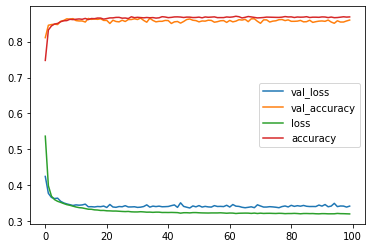

In [23]:
# model_loss

model_loss.plot()

In [0]:
predictions = model.predict_classes(X_test)

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1595
           1       0.70      0.55      0.61       405

    accuracy                           0.86      2000
   macro avg       0.79      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000



In [0]:
cm = confusion_matrix(y_test, predictions)

In [28]:
cm

array([[1499,   96],
       [ 184,  221]])

In [0]:
# Tuning the ANN

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 11, activation = 'relu'))
    classifier.add(Dense(units = 6, activation = 'relu'))
    classifier.add(Dense(units = 3, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [25,32],
              'epochs': [100,250],
              'optimizer': ['adam', 'rmsprop','Adamax']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',cv = 3)
grid_search = grid_search.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
Epoch 7/100
5334/5334 [==============================] - 1s 139us/step - loss: 0.4003 - accuracy: 0.8350
Epoch 8/100
5334/5334 [==============================] - 1s 145us/step - loss: 0.3941 - accuracy: 0.8365
Epoch 9/100
5334/5334 [==============================] - 1s 122us/step - loss: 0.3882 - accuracy: 0.8420
Epoch 10/100
5334/5334 [==============================] - 1s 141us/step - loss: 0.3808 - accuracy: 0.8436
Epoch 11/100
5334/5334 [==============================] - 1s 114us/step - loss: 0.3731 - accuracy: 0.8476
Epoch 12/100
5334/5334 [==============================] - 1s 112us/step - loss: 0.3654 - accuracy: 0.8526
Epoch 13/100
5334/5334 [==============================] - 1s 112us/step - loss: 0.3588 - accuracy: 0.8560
Epoch 14/100
5334/5334 [==============================] - 1s 117us/step - loss: 0.3533 - accuracy: 0.8573
Epoch 15/100
5334/5334 [==============================] - 1s 131us/step - loss: 0.3488 - accuracy: 0.854